In [1]:
import os
os.chdir(r'C:\Users\zhang\Desktop\Machine Learning\Project\data')

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy.stats import shapiro

In [3]:
data = pd.read_csv('final_version.csv', index_col = 0)

In [4]:
data.dtypes

Creatinine                                               float64
Urea nitrogen                                            float64
Sodium                                                   float64
Chloride                                                 float64
Bicarbonate                                              float64
Glucose                                                  float64
Anion gap                                                float64
Platelets                                                float64
Leukocytes                                               float64
Erythrocyte mean corpuscular hemoglobin concentration    float64
Erythrocytes                                             float64
Erythrocyte mean corpuscular volume                      float64
Erythrocyte distribution width                           float64
Magnesium                                                float64
pH of Blood                                              float64
Calcium                  

In [5]:
# check missing value
data.isnull().sum()

Creatinine                                               156
Urea nitrogen                                             14
Sodium                                                     1
Chloride                                                   1
Bicarbonate                                               15
Glucose                                                   45
Anion gap                                                 16
Platelets                                                 18
Leukocytes                                                46
Erythrocyte mean corpuscular hemoglobin concentration      2
Erythrocytes                                               5
Erythrocyte mean corpuscular volume                       10
Erythrocyte distribution width                            26
Magnesium                                                  8
pH of Blood                                               48
Calcium                                                   15
Carbon dioxide in Blood 

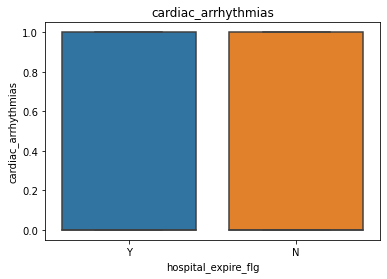

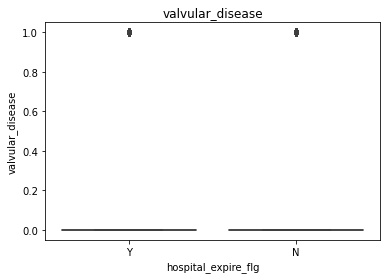

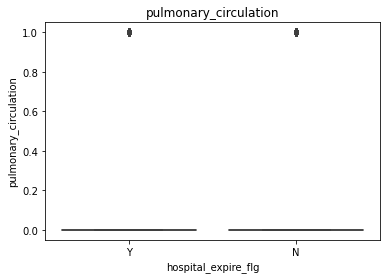

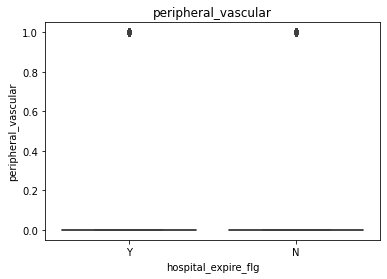

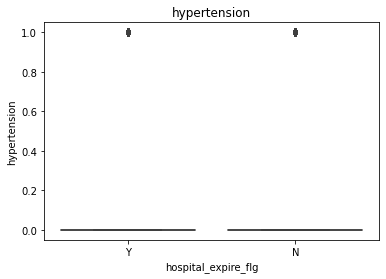

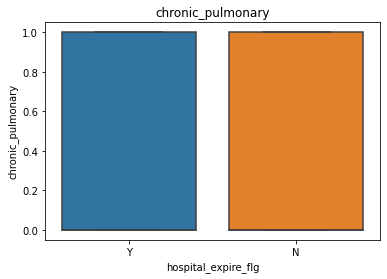

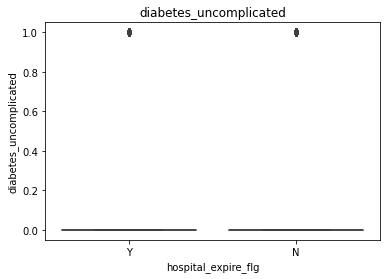

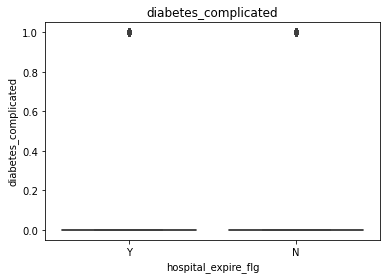

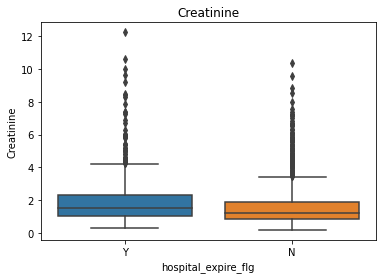

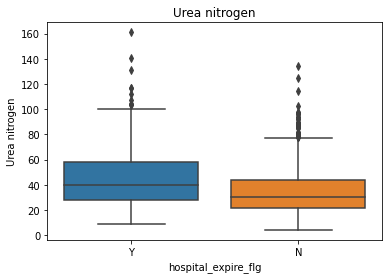

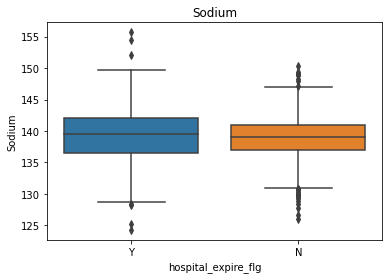

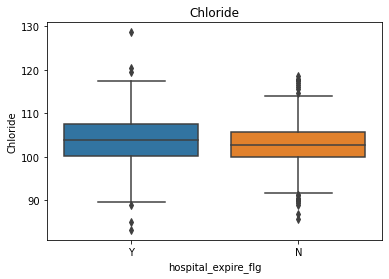

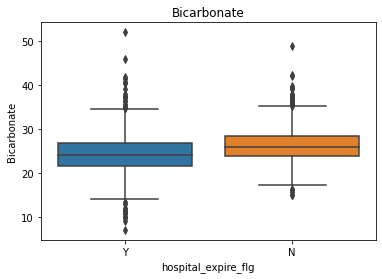

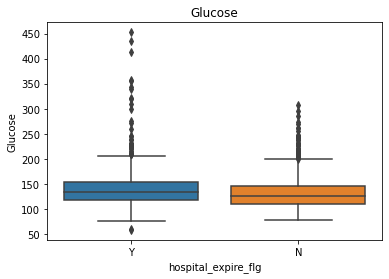

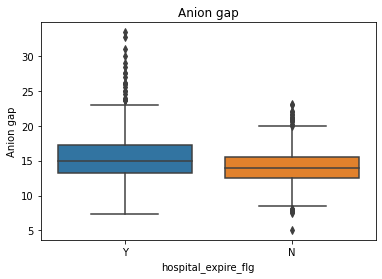

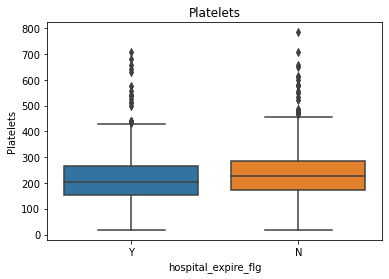

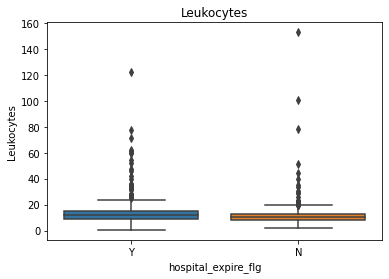

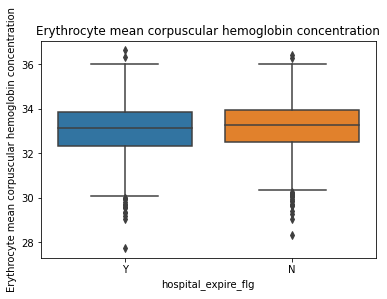

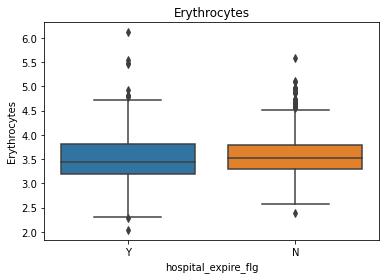

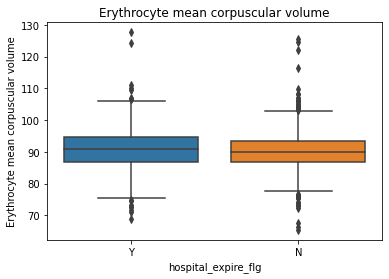

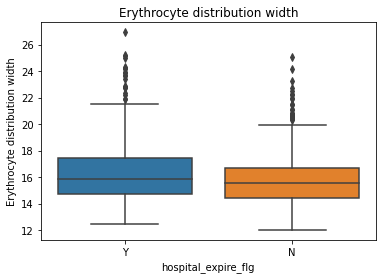

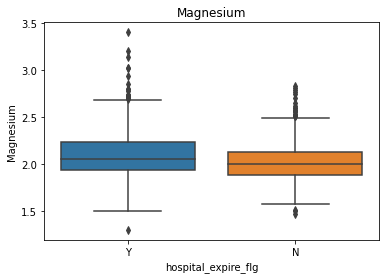

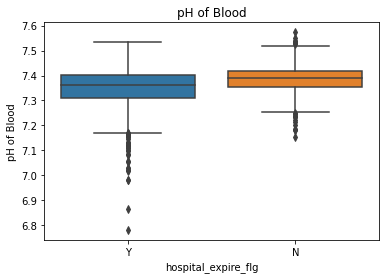

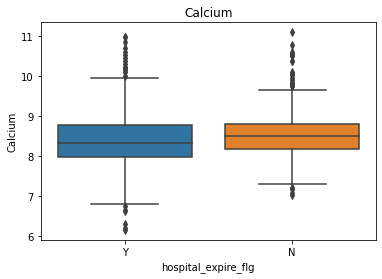

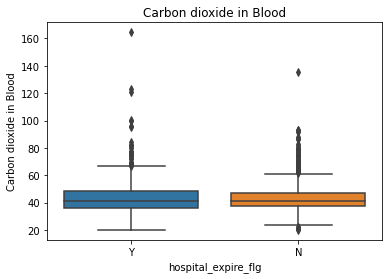

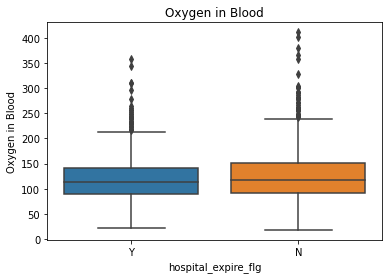

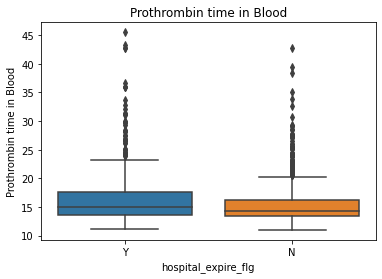

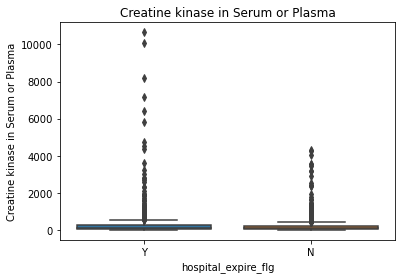

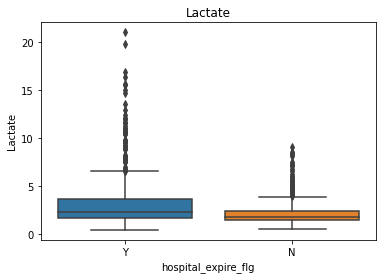

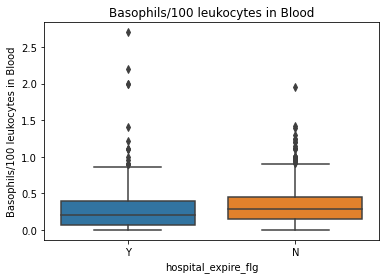

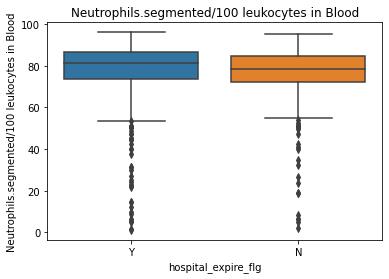

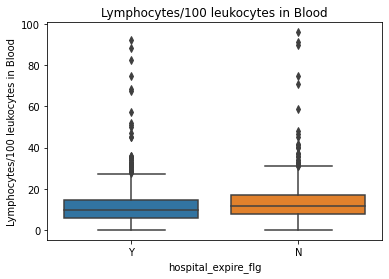

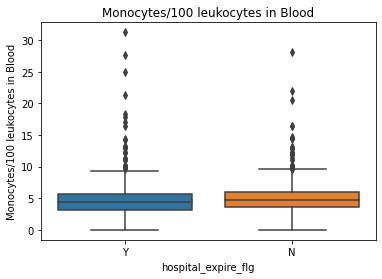

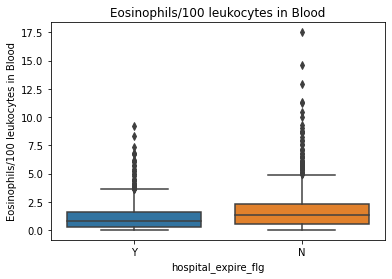

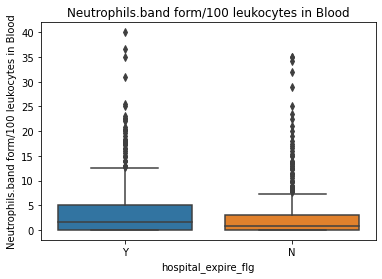

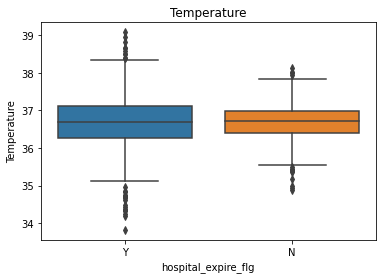

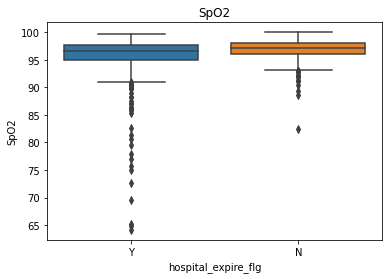

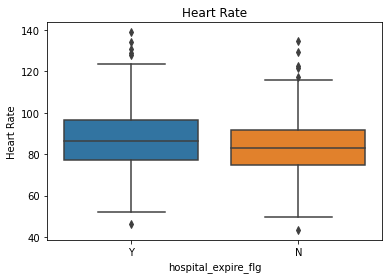

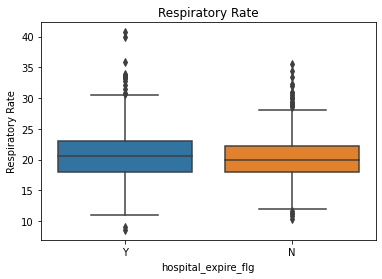

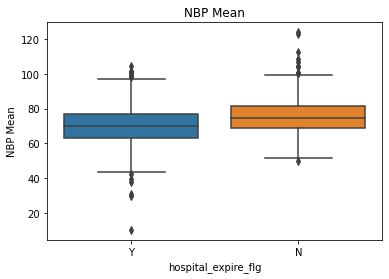

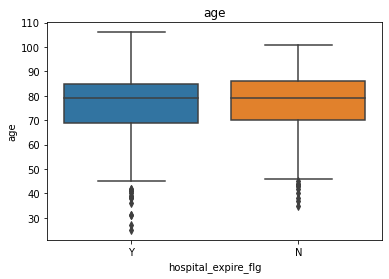

In [40]:
# all of variables have missing value less than 25%
# use box plot to detect outlier
# remove outlier manually in Excel
for col in data.columns[1: -1]:
    sns.boxplot(y = data[col], x = data['hospital_expire_flg'])
    plt.title(col)
    plt.show()

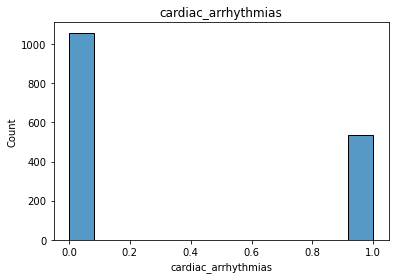

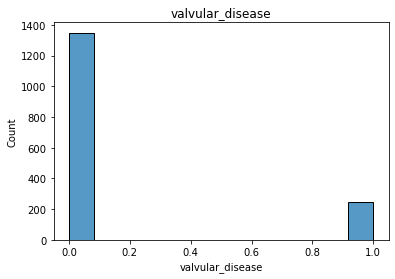

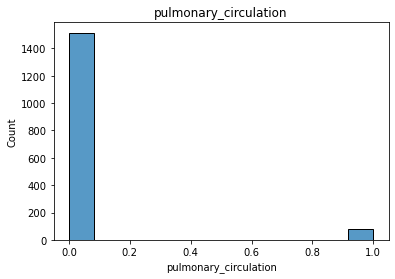

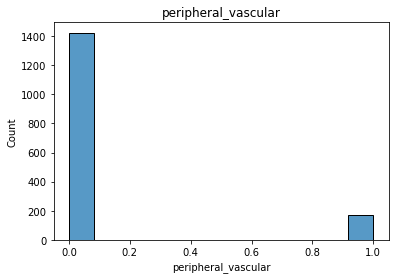

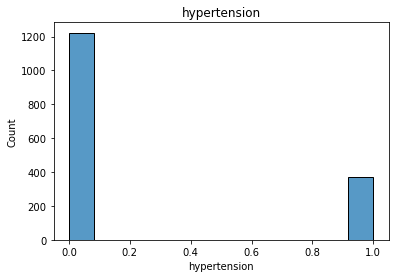

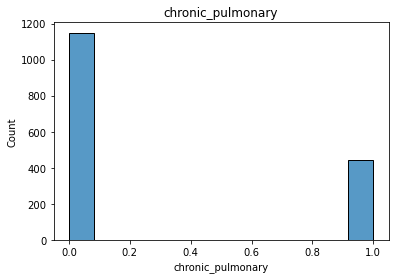

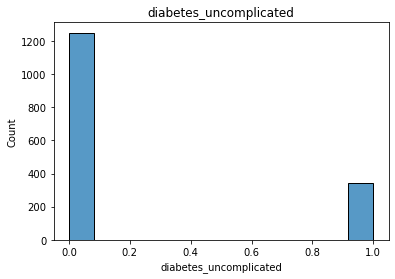

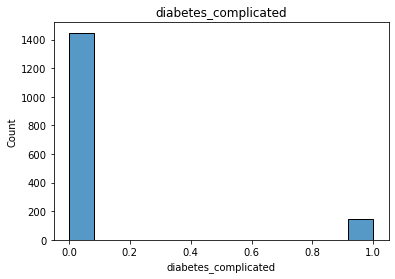

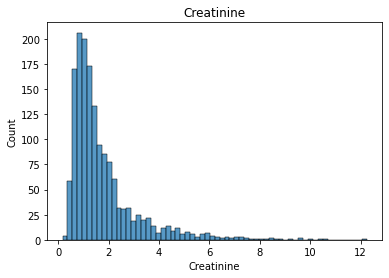

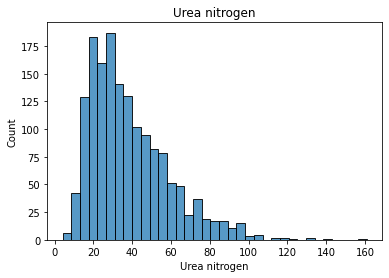

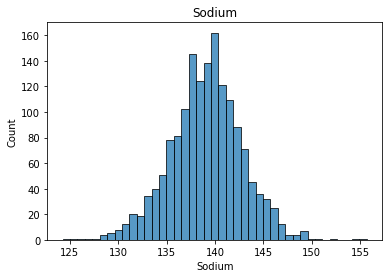

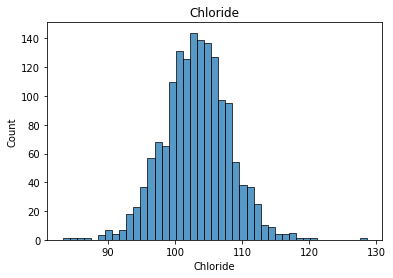

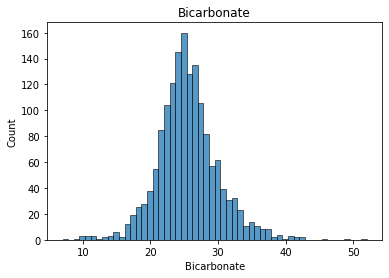

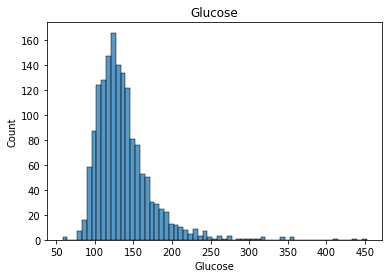

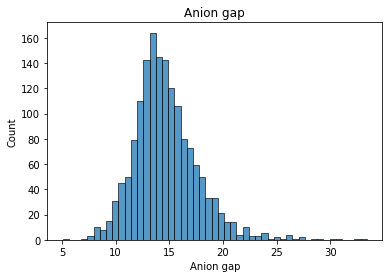

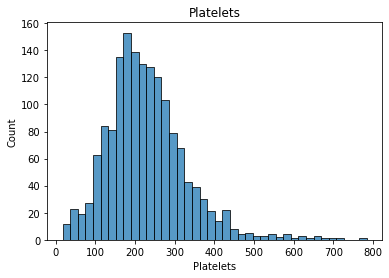

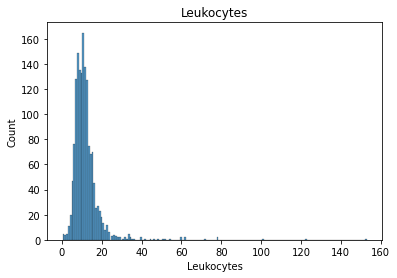

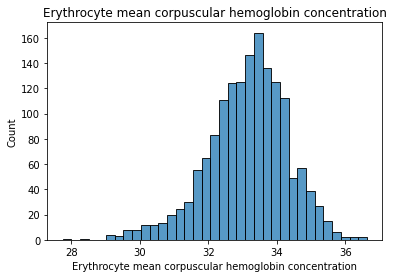

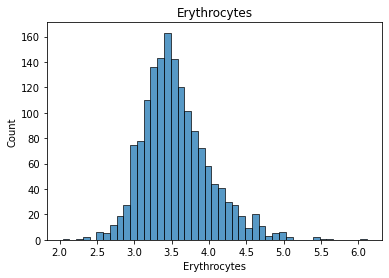

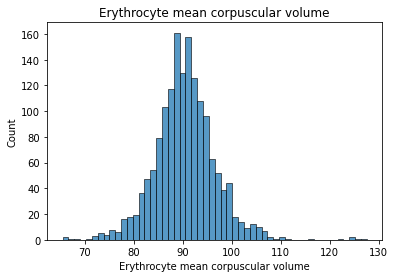

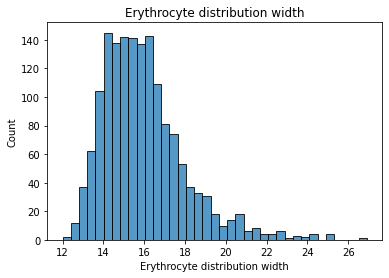

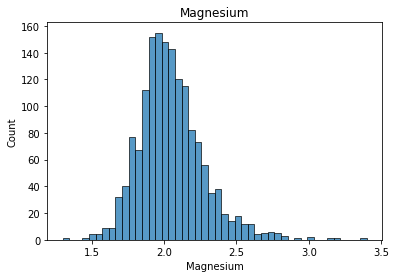

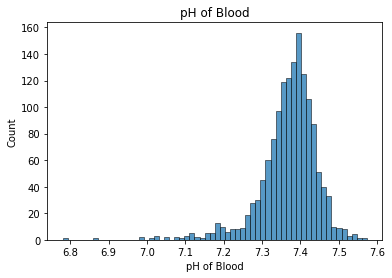

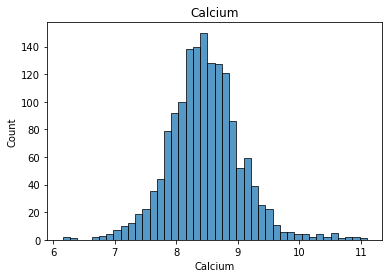

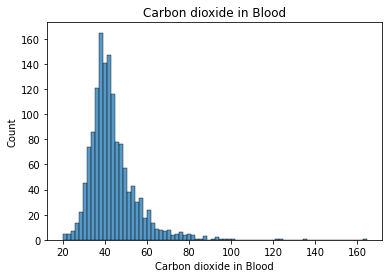

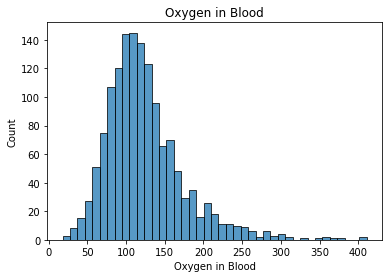

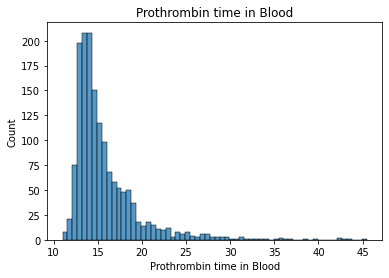

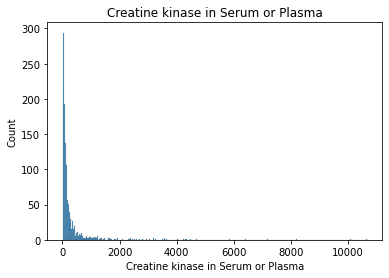

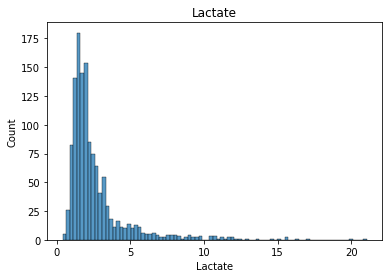

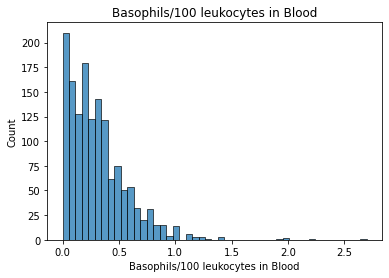

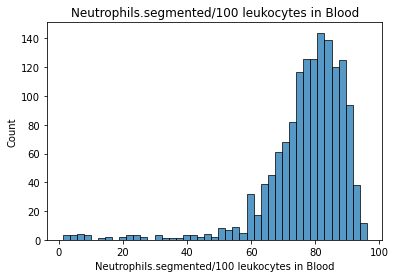

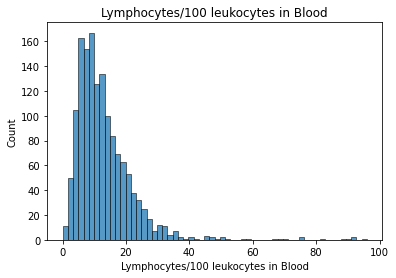

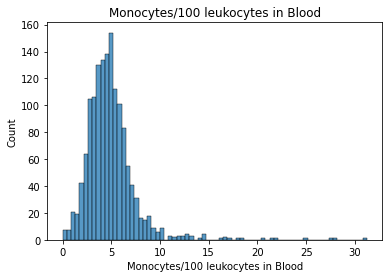

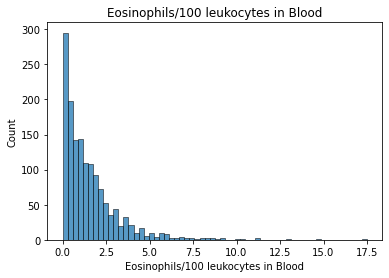

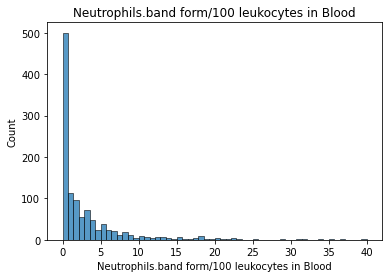

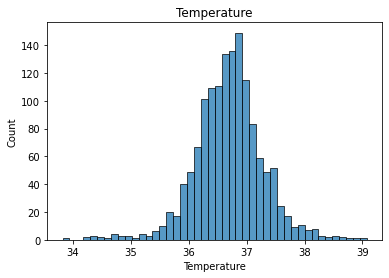

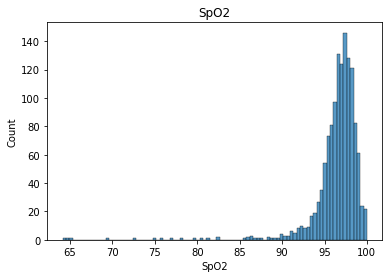

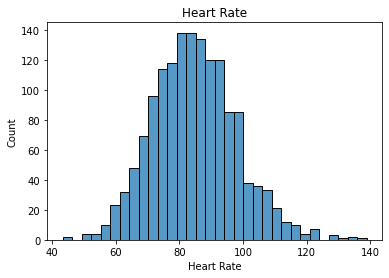

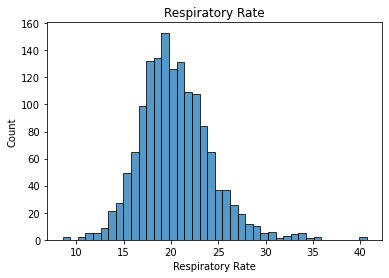

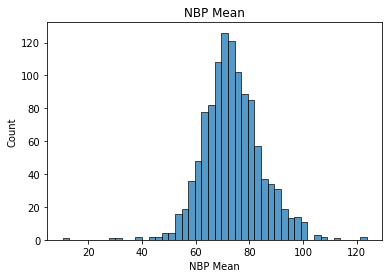

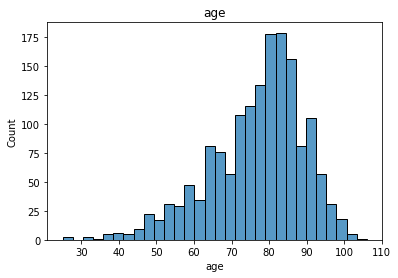

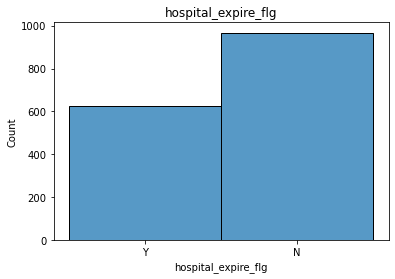

In [41]:
for col in data.columns[1: ]:
    sns.histplot(x = data[col])
    plt.title(col)
    plt.show()

In [15]:
def Normalization_test(df):
    pvalue = []
    for i in df.columns:
        value = df[i].dropna()
        shapiro_test = shapiro(value)
        pvalue.append(shapiro_test.pvalue)
    return pvalue

In [16]:
Normalization_test(data)

[1.3525683702880089e-27,
 3.37911804313727e-26,
 0.00012607203098013997,
 0.014054366387426853,
 1.7473401892065255e-10,
 1.7516345632149943e-19,
 1.3726440990791122e-11,
 1.0416861600734406e-12,
 1.1559616391065863e-15,
 2.6244088499605134e-11,
 8.014274228247079e-16,
 1.8081800590152852e-07,
 6.539118651233692e-20,
 6.9715995400666114e-15,
 1.0399147688799903e-11,
 9.336411494587082e-06,
 1.555300060180175e-17,
 9.198813220851677e-20,
 1.9074314643085942e-26,
 2.663433219302178e-29,
 7.953378476833289e-25,
 7.389114498901422e-27,
 4.67711027695845e-19,
 3.5893344736955186e-23,
 1.3195429124368552e-11,
 1.0506777200214673e-28,
 1.211320066639741e-34,
 4.473101056223783e-11,
 3.341868352838935e-19,
 4.819943910661095e-08,
 7.636880461348028e-09,
 1.6405187988122164e-22]

In [18]:
# all of variables don't obey normal distribution
# missing value should be filled with median
for i in data.columns:
    data[i].fillna(data[i].median(), inplace = True)

In [20]:
Normalization_test(data)

[3.377289309460498e-30,
 2.3266161256059026e-26,
 0.00011732877464964986,
 0.013441573828458786,
 5.719880818988443e-11,
 3.966533631818358e-20,
 6.2242082148056266e-12,
 5.313810914724104e-13,
 1.983839042137849e-16,
 2.384319304493676e-11,
 6.415368250197763e-16,
 7.991394568307442e-08,
 3.342947048056492e-20,
 4.829737819530763e-15,
 2.9839016457353096e-13,
 3.0752485145058017e-06,
 1.0159358871096922e-18,
 9.538482984051787e-21,
 1.3510681430837041e-28,
 9.838962103134434e-34,
 5.996146955431471e-29,
 3.363050779983225e-27,
 7.698752199259732e-20,
 6.980514976608571e-24,
 8.052306651323837e-13,
 5.400756320785179e-30,
 4.9831854949547685e-40,
 3.1415412805879672e-12,
 5.6444070619394495e-21,
 4.819943910661095e-08,
 3.163380224435741e-09,
 4.890608815144977e-23]

In [82]:
data.loc[21684, 'sex'] = 'M'
data.loc[22042, 'sex'] = 'M'
data.loc[23919, 'sex'] = 'M'
data.loc[26237, 'sex'] = 'M'

In [84]:
data.to_csv('machine_learning.csv')

,sex,cardiac_arrhythmias,valvular_disease,pulmonary_circulation,peripheral_vascular,hypertension,chronic_pulmonary,diabetes_uncomplicated,diabetes_complicated,Creatinine,...,Monocytes/100 leukocytes in Blood,Eosinophils/100 leukocytes in Blood,Neutrophils.band form/100 leukocytes in Blood,Temperature,SpO2,Heart Rate,Respiratory Rate,NBP Mean,age,hospital_expire_flg
subject_id,,,,,,,,,,,,,,,,,,,,,
56,F,0,0,0,0,1,0,0,0,0.725000,...,5.000000,0.000000,6.000000,36.392580,99.686275,79.226415,25.769231,69.532056,91,Y
37,M,0,0,0,0,0,1,1,0,0.957143,...,5.420000,2.640000,0.000000,37.425933,96.531250,81.093750,22.161290,73.144436,70,N
26,M,1,0,0,0,0,0,0,0,1.300000,...,4.662500,1.016250,1.000000,37.161110,97.564103,70.580000,20.060000,61.241138,73,N
3,M,0,0,0,0,0,0,0,0,1.647368,...,5.928571,2.085714,2.333333,36.256956,97.133333,92.376471,20.449034,75.104169,77,N
21,M,0,0,0,0,0,0,1,0,3.446667,...,3.590909,1.190909,0.125000,36.494510,96.823699,76.756098,17.926230,73.665405,88,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32393,M,1,1,1,1,1,1,0,0,1.556000,...,3.750000,1.425000,1.000000,36.396820,97.067568,103.256757,27.777027,73.665405,79,Y
32591,F,0,1,1,1,0,0,0,0,5.428571,...,4.662500,1.016250,1.000000,33.819426,96.996063,57.733333,15.000000,49.272727,90,Y
32618,M,0,0,0,0,0,1,0,0,3.720000,...,2.550000,0.450000,2.000000,36.753746,96.081633,82.804196,23.867133,63.013889,62,Y


In [ ]:
# This table can be used for machine learning task